In [1]:
# 부트스트래핑

In [24]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = "/System/Library/fonts/AppleSDGothicNeo.ttc"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc('font', family=font_name)
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import datasets

Apple SD Gothic Neo


In [3]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=0)
coef

array(42.38550486)

In [4]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()

In [6]:
result.params

const    -1.628364
X1       42.853356
dtype: float64

In [7]:
%%time
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1


CPU times: user 1.34 s, sys: 20.2 ms, total: 1.36 s
Wall time: 1.37 s


/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Apple SD Gothic Neo'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Apple SD Gothic Neo'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


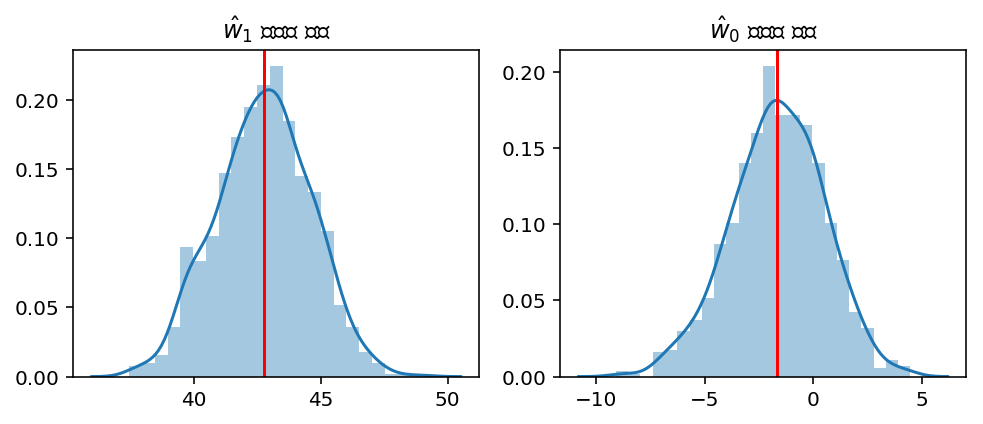

In [25]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c='r')
plt.title("$\hat{w}_1$ 추정치 분포")

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c='r')
plt.title("$\hat{w}_0$ 추정치 분포")
plt.show()

In [26]:
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           2.21e-36
Time:                        01:26:23   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4